In [ ]:
!unzip all_csv.zip

Archive:  all_csv.zip
   creating: all_csv/
  inflating: all_csv/mixup_data_augmentation_temperature_1.csv  
  inflating: __MACOSX/all_csv/._mixup_data_augmentation_temperature_1.csv  
  inflating: all_csv/ensemble_gan_50.csv  
  inflating: __MACOSX/all_csv/._ensemble_gan_50.csv  
  inflating: all_csv/rotation_with_temperature_1.csv  
  inflating: __MACOSX/all_csv/._rotation_with_temperature_1.csv  
  inflating: all_csv/adam.csv        
  inflating: __MACOSX/all_csv/._adam.csv  
  inflating: all_csv/.DS_Store       
  inflating: __MACOSX/all_csv/._.DS_Store  
  inflating: all_csv/self_gan_50.csv  
  inflating: __MACOSX/all_csv/._self_gan_50.csv  
  inflating: all_csv/ensemble_gan_12.5.csv  
  inflating: __MACOSX/all_csv/._ensemble_gan_12.5.csv  
  inflating: all_csv/emnist_350k.csv  
  inflating: __MACOSX/all_csv/._emnist_350k.csv  
  inflating: all_csv/ensemble_gan_25.csv  
  inflating: __MACOSX/all_csv/._ensemble_gan_25.csv  
  inflating: all_csv/ensemble_cifar_without_gan.csv  
  in

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df_without_gan = pd.read_csv("/content/all_csv/self_cifar_without_gan.csv")
df__gan_12_5 = pd.read_csv("/content/all_csv/self_gan_12.5.csv")
df__gan_25 = pd.read_csv("/content/all_csv/self_gan_25.csv")
df__gan_37_5 = pd.read_csv("/content/all_csv/self_gan_37.5.csv")
df__gan_50 = pd.read_csv("/content/all_csv/self_gan_50.csv")

dfs_cifar100 = {"CIFAR-100": df_without_gan,
                "+12.5k GAN": df__gan_12_5,
                "+25k GAN": df__gan_25,
                "+37.5k GAN": df__gan_37_5,
                "+50k GAN": df__gan_50}


df_without_gan_ensemble = pd.read_csv("/content/all_csv/ensemble_cifar_without_gan.csv")
df__gan_12_5_ensemble = pd.read_csv("/content/all_csv/ensemble_gan_12.5.csv")
df__gan_25_ensemble = pd.read_csv("/content/all_csv/ensemble_gan_25.csv")
df__gan_37_5_ensemble = pd.read_csv("/content/all_csv/ensemble_gan_37.5.csv")
df__gan_50_ensemble = pd.read_csv("/content/all_csv/ensemble_gan_50.csv")

dfs_cifar100_ensemble = {"CIFAR-100": df_without_gan_ensemble,
                "+12.5k GAN": df__gan_12_5_ensemble,
                "+25k GAN": df__gan_25_ensemble,
                "+37.5k GAN": df__gan_37_5_ensemble,
                "+50k GAN": df__gan_50_ensemble}


In [ ]:
axis_titles = []
self_agreement = []
self_accuracy = []
self_train_agreement = []
for key, df in dfs_cifar100.items():
  agree = df[df['epoch'] == 20]['test_ts_agree'].item()
  acc = df[df['epoch'] == 20]['test_acc'].item()
  t_acc = df[df['epoch'] == 20]['test_acc'].item()
  agree_train = df[df['epoch'] == 20]['train_ts_agree'].item()

  axis_titles.append(key)
  self_agreement.append(agree)
  self_accuracy.append(acc)
  self_train_agreement.append(agree_train)

axis_titles = []
ensemble_agreement = []
ensemble_accuracy = []
ensemble_train_agreement = []
for key, df in dfs_cifar100_ensemble.items():
  agree = df[df['epoch'] == 20]['test_ts_agree'].item()
  acc = df[df['epoch'] == 20]['test_acc'].item()
  agree_train = df[df['epoch'] == 20]['train_ts_agree'].item()

  axis_titles.append(key)
  ensemble_agreement.append(agree)
  ensemble_accuracy.append(acc)
  ensemble_train_agreement.append(agree_train)


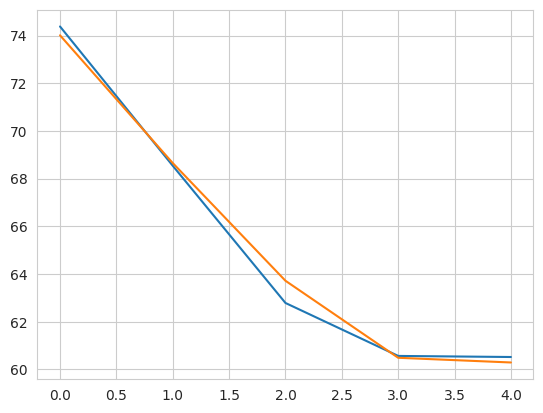

In [ ]:
plt.plot(self_train_agreement)
plt.plot(ensemble_train_agreement)

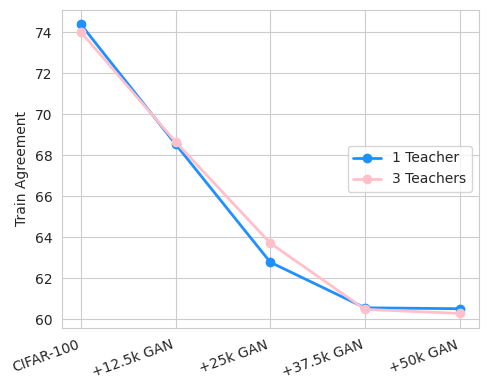

In [ ]:
# Sample data (approximate from the plot)
x_labels = ["CIFAR-100", "+12.5k GAN", "+25k GAN", "+37.5k GAN", "+50k GAN"]
x = np.arange(len(x_labels))  # X-axis positions

# Data values

teacher_accuracy = t_acc  # Constant teacher accuracy

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(5, 4))



# Colors
agreement_color = "dodgerblue"
accuracy_color = "pink"

# Plot Agreement (right y-axis)
ax1.plot(x, self_train_agreement, marker="o", color=agreement_color, linewidth=2, label="1 Teacher")
#ax2.fill_between(x, np.array(agreement) - 1, np.array(agreement) + 1, color=agreement_color, alpha=0.3)

# Plot Student Accuracy (left y-axis)
ax1.plot(x, ensemble_train_agreement, marker="o", color=accuracy_color, linewidth=2, label="3 Teachers")
#ax1.fill_between(x, np.array(student_accuracy) - 1, np.array(student_accuracy) + 1, color=accuracy_color, alpha=0.3)

# Labels and limits
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=20, ha="right")  # Tilted labels
ax1.set_ylabel("Train Agreement")
#ax1.set_ylim(78, 100)

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(handles1, labels1, loc="center right", fontsize=10, frameon=True)

# Grid and layout
sns.set_style("whitegrid")
plt.tight_layout()
plt.savefig('train_cifar.png')
plt.show()

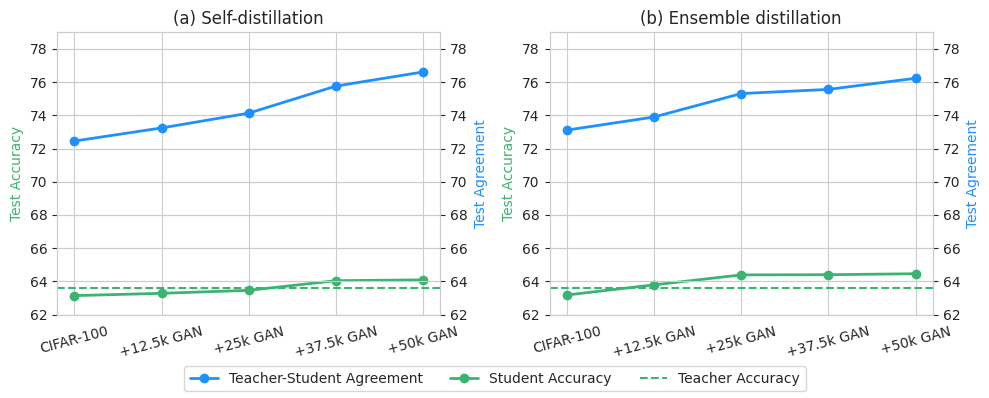

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (approximate from the plot)
x_labels = ["CIFAR-100", "+12.5k GAN", "+25k GAN", "+37.5k GAN", "+50k GAN"]
x = np.arange(len(x_labels))  # X-axis positions

# Self-distillation data
teacher_accuracy = 63.58  # Constant teacher accuracy

# Ensemble distillation data
ensemble_teacher_accuracy = 63.58  # Constant teacher accuracy

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)

# Plot settings
sns.set_style("whitegrid")

# Colors
agreement_color = "dodgerblue"  # Color for Teacher-Student Agreement
accuracy_color = "mediumseagreen"  # Color for Accuracy

# --- Self-distillation plot ---
ax1 = axes[0]
ax1.set_title("(a) Self-distillation")

# Twin y-axis for Test Agreement
ax1_right = ax1.twinx()

# Plot Agreement on right y-axis
ax1_right.plot(x, self_agreement, marker="o", color=agreement_color, linewidth=2, label="Teacher-Student Agreement")
#ax1_right.fill_between(x, np.array(self_agreement) - 0.5, np.array(self_agreement) + 0.5, color=agreement_color, alpha=0.3)
ax1_right.set_ylabel("Test Agreement", color=agreement_color)
ax1_right.set_ylim(62, 79)

# Plot Student Accuracy on left y-axis
ax1.plot(x, self_accuracy, marker="o", color=accuracy_color, linewidth=2, label="Student Accuracy")
#ax1.fill_between(x, np.array(self_accuracy) - 0.5, np.array(self_accuracy) + 0.5, color=accuracy_color, alpha=0.3)

# Plot Teacher Accuracy (dashed)
ax1.axhline(teacher_accuracy, linestyle="dashed", color=accuracy_color, label="Teacher Accuracy")

# Labels
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=15)
ax1.set_ylabel("Test Accuracy", color=accuracy_color)
ax1.set_ylim(62, 79)

# --- Ensemble distillation plot ---
ax2 = axes[1]
ax2.set_title("(b) Ensemble distillation")

# Twin y-axis for Test Agreement
ax2_right = ax2.twinx()

# Plot Agreement on right y-axis
ax2_right.plot(x, ensemble_agreement, marker="o", color=agreement_color, linewidth=2, label="Teacher-Student Agreement")
#ax2_right.fill_between(x, np.array(ensemble_agreement) - 0.5, np.array(ensemble_agreement) + 0.5, color=agreement_color, alpha=0.3)
ax2_right.set_ylabel("Test Agreement", color=agreement_color)
ax2_right.set_ylim(62, 79)

# Plot Student Accuracy on left y-axis
ax2.plot(x, ensemble_accuracy, marker="o", color=accuracy_color, linewidth=2, label="Student Accuracy")
#ax2.fill_between(x, np.array(ensemble_accuracy) - 0.5, np.array(ensemble_accuracy) + 0.5, color=accuracy_color, alpha=0.3)

# Plot Teacher Accuracy (dashed)
ax2.axhline(ensemble_teacher_accuracy, linestyle="dashed", color=accuracy_color, label="Teacher Accuracy")

# Labels
ax2.set_xticks(x)
ax2.set_xticklabels(x_labels, rotation=15)
ax2.set_ylabel("Test Accuracy", color=accuracy_color)
ax2.set_ylim(62, 79)

# Shared x-axis label
#fig.text(0.5, 0.02, "GAN Data Augmentation", ha="center", fontsize=12)

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()  # Left y-axis
handles2, labels2 = ax1_right.get_legend_handles_labels()  # Right y-axis

# Combine handles and labels, ensuring the correct order
handles = [
    handles2[0],  # Teacher-Student Agreement
    handles1[0],  # Student Accuracy
    handles1[1],  # Teacher Accuracy
]
labels = [
    labels2[0],  # Teacher-Student Agreement
    labels1[0],  # Student Accuracy
    labels1[1],  # Teacher Accuracy
]

# Create global legend
fig.legend(handles, labels, loc="lower center", ncol=3, fontsize=10)

plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig('cifar.png')
plt.show()


In [ ]:
df_mnist = pd.read_csv("/content/all_csv/mnist.csv")
df__emnist_175 = pd.read_csv("/content/all_csv/emnist_175k.csv")
df__emnist_350 = pd.read_csv("/content/all_csv/emnist_350k.csv")

dfs_mnist = [df_mnist, df__emnist_175, df__emnist_350]

In [ ]:
axis_titles = []
agreement = []
student_accuracy = []
t_acc = 80.54
for df in dfs_mnist:
  agree = df[df['epoch'] == 30]['test_ts_agree'].item()
  acc = df[df['epoch'] == 30]['test_acc'].item()

  if agree == 100.0:
    acc = t_acc


  agreement.append(agree)
  student_accuracy.append(acc)

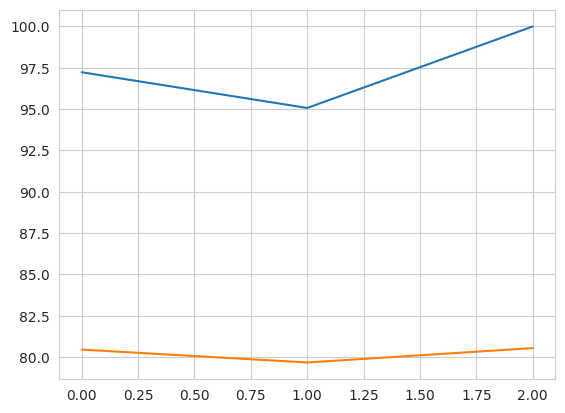

In [ ]:
plt.plot(agreement)
plt.plot(student_accuracy)

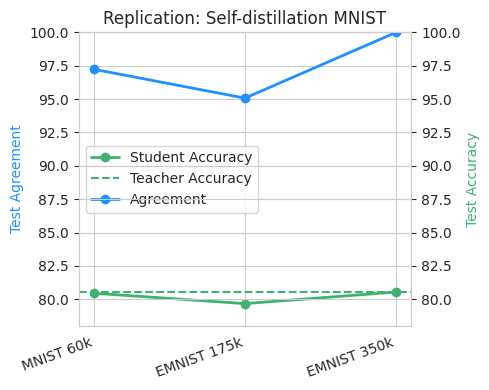

In [ ]:
# Sample data (approximate from the plot)
x_labels = ["MNIST 60k", "EMNIST 175k", "EMNIST 350k"]
x = np.arange(len(x_labels))  # X-axis positions

# Data values
teacher_accuracy = t_acc  # Constant teacher accuracy

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(5, 4))

# Second y-axis
ax2 = ax1.twinx()

# Colors
agreement_color = "dodgerblue"
accuracy_color = "mediumseagreen"

# Plot Agreement (right y-axis)
ax2.plot(x, agreement, marker="o", color=agreement_color, linewidth=2, label="Agreement")

# Plot Student Accuracy (left y-axis)
ax1.plot(x, student_accuracy, marker="o", color=accuracy_color, linewidth=2, label="Student Accuracy")

# Plot Teacher Accuracy (dashed, left y-axis)
ax1.axhline(teacher_accuracy, linestyle="dashed", color=accuracy_color, label="Teacher Accuracy")

# Labels and limits
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=20, ha="right")  # Tilted labels

# Swap y-axis label positions
ax1.set_ylabel("Test Agreement", color=agreement_color)  # Moved to left y-axis
ax1.set_ylim(78, 100)

ax2.set_ylabel("Test Accuracy", color=accuracy_color)  # Moved to right y-axis
ax2.set_ylim(78, 100)
ax2.set_title("Replication: Self-distillation MNIST")

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles, labels, loc="center left", fontsize=10, frameon=True)

# Grid and layout
sns.set_style("whitegrid")
plt.tight_layout()
plt.savefig("mnist.png")
plt.show()


In [ ]:
import pandas as pd

df_base_1 = pd.read_csv("/content/all_csv/baseline_with_temperature_1.csv")
df_base_4 = pd.read_csv("/content/all_csv/baseline_with_temperature_4.csv")
df_mixup = pd.read_csv("/content/all_csv/mixup_data_augmentation_temperature_1.csv")
df_rotation = pd.read_csv("/content/all_csv/rotation_with_temperature_1.csv")

dfs_da = [df_base_1, df_base_4, df_rotation, df_mixup]

In [ ]:
agreement = []
student_accuracy = []
train_agreement = []
t_acc = 80.54
for df in dfs_da:
  agree = df[df['epoch'] == 20]['test_ts_agree'].item()
  acc = df[df['epoch'] == 20]['test_acc'].item()
  train_agree = df[df['epoch'] == 20]['train_ts_agree'].item()

  agreement.append(agree)
  student_accuracy.append(acc)
  train_agreement.append(train_agree)

In [ ]:
print(agreement)
print(student_accuracy)

[66.85, 73.11, 54.15, 67.13]
[59.67, 63.18, 47.23, 58.37]


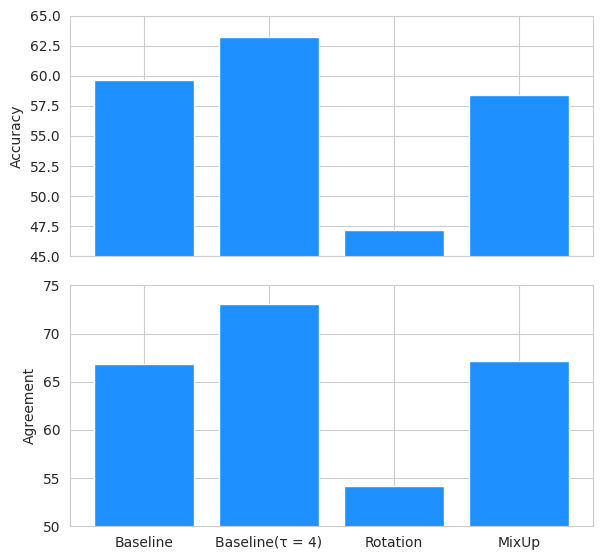

In [ ]:
# Sample data
categories = ["Baseline", "Baseline(τ = 4)", "Rotation", "MixUp"]

# Set Seaborn style
sns.set_style("whitegrid")

# Create figure and subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

# --- First bar plot ---
axes[0].bar(categories, student_accuracy, color="dodgerblue", alpha=1)
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(45, 65)

# --- Second bar plot ---
axes[1].bar(categories, agreement, color="dodgerblue", alpha=1)
axes[1].set_ylabel("Agreement")
axes[1].set_ylim(50, 75)


# Adjust layout for clarity
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.savefig("augmentation.png")

# Show plot
plt.show()


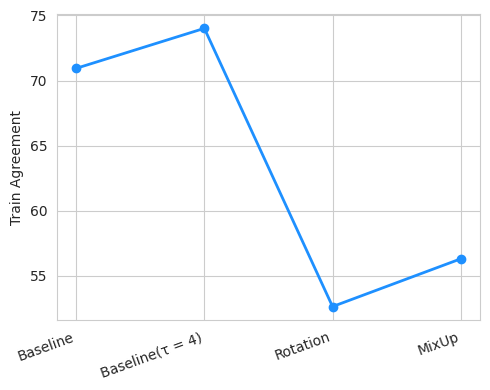

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data (approximate from the plot)
x_labels = ["Baseline", "Baseline(τ = 4)", "Rotation", "MixUp"]
x = np.arange(len(x_labels))  # X-axis positions

# Data values

teacher_accuracy = t_acc  # Constant teacher accuracy

# Create figure and axes
fig, ax1 = plt.subplots(figsize=(5, 4))



# Colors
agreement_color = "dodgerblue"
accuracy_color = "mediumseagreen"

# Plot Agreement (right y-axis)
ax1.plot(x, train_agreement, marker="o", color=agreement_color, linewidth=2, label="self-distillation")
#ax2.fill_between(x, np.array(agreement) - 1, np.array(agreement) + 1, color=agreement_color, alpha=0.3)

# Labels and limits
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=20, ha="right")  # Tilted labels
ax1.set_ylabel("Train Agreement")
#ax1.set_ylim(78, 100)

# Legend
handles1, labels1 = ax1.get_legend_handles_labels()
#ax1.legend(handles1, labels1, loc="center right", fontsize=10, frameon=True)

# Grid and layout
sns.set_style("whitegrid")
plt.tight_layout()
plt.savefig('train_agreement.png')
plt.show()

In [ ]:
df_sgd = pd.read_csv("/content/all_csv/sgd.csv")
df_adam = pd.read_csv("/content/all_csv/adam.csv")

In [ ]:
epochs_sgd = [50,100,150]
agreement_sgd = []
for epoch in epochs_sgd:
  agree = df_sgd[df_sgd['epoch'] == epoch]['train_ts_agree'].item()
  agreement_sgd.append(agree)

print(agreement_sgd)

epochs_adam = [50,100,150]
agreement_adam = []
for epoch in epochs_adam:
  agree = df_adam[df_adam['epoch'] == epoch]['train_ts_agree'].item()
  agreement_adam.append(agree)

print(agreement_adam)

[71.776, 75.904, 78.544]
[65.956, 70.122, 71.094]


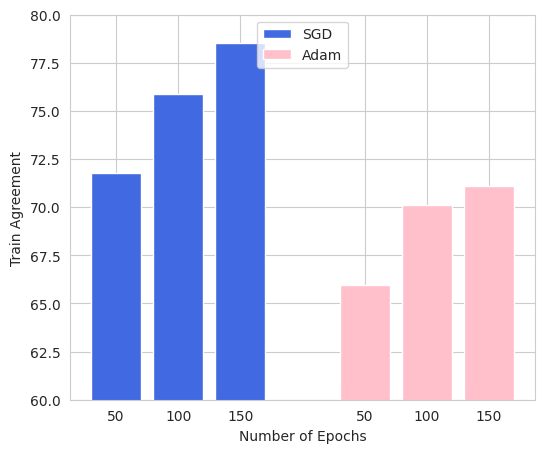

In [ ]:
# Sample data
group1 = [5, 7, 6]  # Values for the first group
group2 = [8, 5, 7]  # Values for the second group

# X positions: First three close, then a gap, then next three
x = np.array([0, 1, 2, 4, 5, 6])  # Adding a gap before group 2

# Bar width
bar_width = 0.8

# Set seaborn style
sns.set_style("whitegrid")

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Plot bars
ax.bar(x[:3], agreement_sgd, width=bar_width, color="royalblue", label="SGD")
ax.bar(x[3:], agreement_adam, width=bar_width, color="pink", label="Adam")

# X-axis labels
ax.set_xticks([0, 1, 2, 4, 5, 6])  # Centered under each group
ax.set_xticklabels(epochs_sgd+epochs_adam)

# Labels and title
ax.set_ylabel("Train Agreement")
ax.set_ylim(60,80)
ax.legend(loc="upper center")

# Labels and title
ax.set_xlabel("Number of Epochs")

# Show plot
plt.savefig("optimizer.png")
plt.show()
